# Proje 1 - Pandas ile Veri Analizi
Aşağıda belirtilen soruların cevaplarını, ilgili boş hücrelere yazınız ve adı öğrenci numaralarından (proje, 1 ve/veya 2 kişi yapılabilir) oluşan nihai Jupyter Notebook (.jpynb) dosyasını, 11.04.2019 Perşembe geceyarısına kadar http://sorubank.ege.edu.tr/~moodle web sitesindeki ilgili ders sayfasını kullanılarak sisteme yükleyiniz. 12.04.2019 Cuma günü ders saatlerinde sınıfta proje kontrolü yapılacaktır, kontrol sırasında projeyi yapan herkesin bulunması gereklidir. Herhangi bir sorunuz olursa, http://sorubank.ege.edu.tr/~moodle web sitesindeki ilgili ders sayfasında bu proje ile ilgili açılan forumu kullanınız.

## Soru-1
### İllere göre belediye hizmetlerinden memnuniyet anketi verilerini alın:
2013 yılında TÜİK tarafından yapılan illere göre belediye hizmetlerinden memnuniyet anketi verilerini, ekte verilen "2013_Belediye Hizmetleri Anketi_1.xls", "2013_Belediye Hizmetleri Anketi_2.xls" ve "2013_Belediye Hizmetleri Anketi_3.xls" dosyalarından yükleyin ve herbiri için birer DataFrame oluşturun ve aşağıdaki işlemleri uygulayın:

```
1- Dosyaların ilk 3 satırını ve son 2 satırını atlayın. Hiyerarşik indekslemeye uygun olarak okuyun. (ipucu: 'header' parametresi)
2- Her bir dataframe'deki boş sütunları (bütün değerleri 'NaN' olan sütunları) silin
3- Ortak sütun üzerinden bu üç veri kümesini birleştirin ve ortak sütunu index olarak belirleyin. Ayrıca index ismini 'İL ADI' olarak belirleyin.
4- Sütun başlıklarından İngilizce kelimeleri silin
5- Memnuniyet oranı olarak '-' belirtilen hücrelerin değerini 'NaN' iledeğiştirin

```

In [30]:
import pandas as pd
import numpy as np  #I only used numpy for replacing data with NaN values. (e.g. task5)
import matplotlib.pyplot as plt
# 1. task
belediye_anketleri_1 = pd.read_excel("2013_Belediye Hizmetleri Anketi_1.xls", skiprows=3, skipfooter=2 ,header = [0,1])
belediye_anketleri_2 = pd.read_excel("2013_Belediye Hizmetleri Anketi_2.xls", skiprows=3, skipfooter=2,header = [0,1])
belediye_anketleri_3 = pd.read_excel("2013_Belediye Hizmetleri Anketi_3.xls", skiprows=3, skipfooter=2,header = [0,1])
# 2. task
belediye_anketleri_1.dropna(axis=1, how='all', inplace=True)
belediye_anketleri_2.dropna(axis=1, how='all', inplace=True)
belediye_anketleri_3.dropna(axis=1, how='all', inplace=True)
# 3. task index üzerinde birleştirme
total_anketler = belediye_anketleri_1.merge(belediye_anketleri_2, on=belediye_anketleri_1.index,left_index=True, right_index=True)
total_anketler = total_anketler.merge(belediye_anketleri_3,on=total_anketler.index,left_index=True, right_index=True)
# 3. task il adı değiştirme
total_anketler.index.name='İL ADI'
#4. task
level0 = [data.split("\n",1)[0] for data in total_anketler.columns.levels[0]]
level1 = [data.split("\n",1)[0] for data in total_anketler.columns.levels[1]]
total_anketler.columns.set_levels(level0, level=0,inplace=True)
total_anketler.columns.set_levels(level1, level=1,inplace=True,verify_integrity = False)
#5.task
total_anketler.replace(to_replace = "-", value =np.nan, inplace=True)
total_anketler

Yeşil alanların miktarı                                \
İl-Province                     Memnun   Orta Memnun değil Fikri yok   
İL ADI                                                                 
Adana                            48.34  12.52        36.50      1.69   
Adıyaman                         33.12  12.44        52.91      1.43   
Afyonkarahisar                   58.41  10.88        26.65      1.32   
Ağrı                             29.16  10.40        35.53      9.84   
Amasya                           71.20   8.21        17.28      1.42   
Ankara                           61.34   9.23        26.62      1.95   
Antalya                          58.57   8.86        27.71      3.54   
Artvin                           68.27   9.08        14.93      4.55   
Aydın                            63.30   9.74        21.35      3.00   
Balıkesir                        62.71   9.49        26.83      0.79   
Bilecik                          65.69  11.78        20.16      1.69   
Bingöl                           38.26   9.89        34.96      5.40   
Bitlis                           37.93   8.78        38.63      8.99   
Bolu                             74.25   7.31        11.15      6.64   
Burdur                           56.47   8.70        26.99      6.85   
Bursa                            62.57   8.25        25.39      2.03   
Çanakkale                        61.45  17.28        19.97      1.21   
Çankırı                          34.58   8.22        53.16      2.43   
Çorum                            49.07   7.20        24.04     18.64   
Denizli                          73.42   7.63        14.27      2.97   
Diyarbakır                       55.21   7.71        20.93      8.23   
Edirne                           60.55   9.91        23.16      5.41   
Elazığ                           36.46  11.58        41.96      5.55   
Erzincan                         65.96   7.11        19.63      4.72   
Erzurum                          40.00   7.78        37.77      4.52   
Eskişehir                        63.32   8.39        20.66      6.83   
Gaziantep                        72.88   5.37        16.46      3.56   
Giresun                          69.65   5.44        15.22      3.24   
Gümüşhane                        54.54   8.91        31.95      3.22   
Hakkari                          24.59   9.90        56.80      1.37   
...                                ...    ...          ...       ...   
Ordu                             63.57   7.83        18.07      3.73   
Rize                             74.40   5.85        13.94      2.89   
Sakarya                          66.24  11.16        14.15      7.14   
Samsun                           60.76  11.32        21.07      2.65   
Siirt                            27.00   6.91        38.11     17.25   
Sinop                            72.35   8.88        12.76      4.97   
Sivas                            60.33   7.78        24.96      1.99   
Tekirdağ                         47.95  10.00        33.62      7.74   
Tokat                            60.18   8.82        27.05      2.83   
Trabzon                          66.44   7.67        21.79      1.41   
Tunceli                          55.46   9.52        24.65      5.48   
Şanlıurfa                        56.88   5.29        21.42      8.66   
Uşak                             69.71  11.48        15.18      3.20   
Van                              43.84  10.44        34.20      6.04   
Yozgat                           49.45   6.56        26.98      5.56   
Zonguldak                        51.12  10.14        32.02      3.77   
Aksaray                          42.74  12.52        36.04      3.84   
Bayburt                          36.35  19.55        36.09      7.26   
Karaman                          63.05   6.58        28.48      1.89   
Kırıkkale                        31.64   7.92        49.52      6.96   
Batman                           22.53  13.92        48.28      7.56   
Şırnak                           34.97  11.16        32


## Soru-2
Tüm hizmetlerde 'Memnun' olanların oranları %50'den yüksek olan illeri bulun.

In [34]:
memnuniyet_tablosu = total_anketler[[memnun_konular for memnun_konular in total_anketler.columns if memnun_konular[1] == "Memnun"]]
memnun_iller = [row[0] for row in memnuniyet_tablosu.iterrows() if row[1][0] > 50]
memnun_iller

['Afyonkarahisar',
 'Amasya',
 'Ankara',
 'Antalya',
 'Artvin',
 'Aydın',
 'Balıkesir',
 'Bilecik',
 'Bolu',
 'Burdur',
 'Bursa',
 'Çanakkale',
 'Denizli',
 'Diyarbakır',
 'Edirne',
 'Erzincan',
 'Eskişehir',
 'Gaziantep',
 'Giresun',
 'Gümüşhane',
 'Isparta',
 'Mersin',
 'İstanbul',
 'Kastamonu',
 'Kayseri',
 'Kırklareli',
 'Kocaeli',
 'Konya',
 'Kütahya',
 'Manisa',
 'Kahramanmaraş',
 'Muğla',
 'Nevşehir',
 'Niğde',
 'Ordu',
 'Rize',
 'Sakarya',
 'Samsun',
 'Sinop',
 'Sivas',
 'Tokat',
 'Trabzon',
 'Tunceli',
 'Şanlıurfa',
 'Uşak',
 'Zonguldak',
 'Karaman',
 'Bartın',
 'Yalova',
 'Karabük',
 'Osmaniye']

## Soru-3
Her hizmet için 'Memnun' olanların oranı en yüksek olan ili ve 'Memnun' olanların oranını bulun.

In [65]:
konulara_göre_en_memnun_iller = memnuniyet_tablosu.idxmax(axis=0)
max_values = memnuniyet_tablosu.max(axis=0)
pd.concat([konulara_göre_en_memnun_iller,max_values],axis=1)


,,0,1
,İl-Province,,
Yeşil alanların miktarı,Memnun,Kastamonu,82.29
Engellilere yönelik düzenlemeler,Memnun,Manisa,71.32
Hasta ve yoksullara yardım,Memnun,Manisa,73.40
Çöp ve çevresel atık toplama hizmeti,Memnun,Eskişehir,86.50
Kanalizasyon hizmeti,Memnun,Kastamonu,82.63
Şebeke suyu hizmeti,Memnun,İstanbul,86.83
Toplu taşıma hizmeti,Memnun,Karaman,78.81
Yol/kaldırım yapımı hizmeti,Memnun,Manisa,76.07
Işıklandırma hizmeti,Memnun,Amasya,89.41


## Soru-4
Tüm hizmetler için 'Memnun' olanların ortalamasını alarak illerin 'Genel Memnuniyet' değerlerini bulun ve veri setine yeni bir sütun olarak ekleyin.

In [68]:
average_memnuniyet = memnuniyet_tablosu.mean(axis=1)
total_anketler["Genel Memnuniyet"] = average_memnuniyet
total_anketler["Genel Memnuniyet"]

İL ADI
Adana             58.154
Adıyaman          35.231
Afyonkarahisar    71.415
Ağrı              40.923
Amasya            73.784
Ankara            65.689
Antalya           58.298
Artvin            65.860
Aydın             69.100
Balıkesir         70.872
Bilecik           73.471
Bingöl            43.007
Bitlis            47.357
Bolu              68.422
Burdur            58.538
Bursa             70.702
Çanakkale         64.904
Çankırı           54.686
Çorum             58.707
Denizli           69.216
Diyarbakır        55.783
Edirne            67.015
Elazığ            46.579
Erzincan          64.645
Erzurum           50.421
Eskişehir         64.583
Gaziantep         71.905
Giresun           65.080
Gümüşhane         60.545
Hakkari           29.178
                   ...  
Ordu              54.894
Rize              67.831
Sakarya           67.799
Samsun            64.787
Siirt             39.690
Sinop             64.613
Sivas             69.685
Tekirdağ          60.581
Tokat             

## Soru-5
### Yerel seçimlerde partilerin il bazında aldıkları belediye meclisi oy sayılarını alın:
2014 yılı yerel seçimlerinde partilerin il bazında aldıkları belediye meclisi oy sayılarını, ekte verilen "2014_Il Bazinda Belediye Meclisi Oy Sayilari.xlsx" dosyasından yükleyin ve başka bir DataFrame daha oluşturun ve aşağıdaki işlemleri uygulayın:

```
1- 'İL ADI' sütununu index olarak belirleyin. 
2- Boş sütunları (bütün değerleri 'NaN' olan sütunları) silin
3- İkinci sütununun ismini 'BÜYÜKŞEHİR' olarak değiştirin, ve o sütunda içeriği 'BÜYÜKŞEHİR' olan hücreleri 'EVET' ile, diğer hücreleri 'HAYIR' ile değiştirin
```

In [5]:
# 1. task
Belediye_Meclisi_Oy_Sayıları = pd.read_excel("2014_Il Bazinda Belediye Meclisi Oy Sayilari.xlsx")
Belediye_Meclisi_Oy_Sayıları.index = Belediye_Meclisi_Oy_Sayıları["İL ADI"]
Belediye_Meclisi_Oy_Sayıları.index.name = "İL ADI"
del Belediye_Meclisi_Oy_Sayıları["İL ADI"]
# 2. task
Belediye_Meclisi_Oy_Sayıları.dropna(axis=1, how='all', inplace=True)
Belediye_Meclisi_Oy_Sayıları.fillna(0,inplace=True)
# 3. task büyükşehir il değiştirme.
Belediye_Meclisi_Oy_Sayıları=Belediye_Meclisi_Oy_Sayıları.rename(columns = {'Unnamed: 1':'BÜYÜKŞEHİR'})
Belediye_Meclisi_Oy_Sayıları.loc[Belediye_Meclisi_Oy_Sayıları['BÜYÜKŞEHİR'] != "BÜYÜKŞEHİR", ["BÜYÜKŞEHİR"]] = 'HAYIR'
Belediye_Meclisi_Oy_Sayıları.loc[Belediye_Meclisi_Oy_Sayıları['BÜYÜKŞEHİR'] == "BÜYÜKŞEHİR", ["BÜYÜKŞEHİR"]] = 'EVET'
Belediye_Meclisi_Oy_Sayıları

,BÜYÜKŞEHİR,KAYITLI SEÇMEN SAYISI,OY KULLANAN SEÇMEN SAYISI,HÜDA PAR,DSP,DYP,TURK PARTİ,TKP,BBP,AK PARTİ,...,HAK-PAR,LDP,BDP,BTP,İP,HDP,CHP,HEPAR,MHP,BAĞIMSIZ
İL ADI,,,,,,,,,,,,,,,,,,,,,
Adana,EVET,1457671,1282849,0.0,4293.0,0.0,0.0,940,9950.0,375366,...,1255.0,200.0,0.0,2760.0,4086.0,100129.0,325503,0.0,363459.0,1759
Adıyaman,HAYIR,256815,223730,873.0,604.0,104.0,0.0,510,14958.0,109801,...,0.0,0.0,14227.0,683.0,0.0,131.0,38177,0.0,19561.0,0
Afyonkarahisar,HAYIR,353839,325418,0.0,131.0,0.0,0.0,371,4756.0,142376,...,0.0,0.0,0.0,307.0,0.0,0.0,35615,0.0,110996.0,822
Ağrı,HAYIR,101690,77104,0.0,0.0,876.0,0.0,267,258.0,24966,...,226.0,4088.0,30618.0,0.0,0.0,0.0,483,0.0,709.0,0
Aksaray,HAYIR,190175,165992,0.0,689.0,0.0,0.0,127,5567.0,84114,...,0.0,0.0,0.0,423.0,0.0,0.0,11708,0.0,52796.0,0
Amasya,HAYIR,157711,143670,0.0,0.0,0.0,0.0,255,877.0,59109,...,0.0,0.0,0.0,71.0,0.0,99.0,33819,0.0,38979.0,0
Ankara,EVET,3609048,3281686,0.0,5006.0,570.0,289.0,4677,153566.0,1333158,...,2147.0,0.0,0.0,4958.0,8926.0,35661.0,1002926,2186.0,542873.0,3792
Antalya,EVET,1514939,1360594,0.0,13166.0,1337.0,174.0,1168,14822.0,441482,...,657.0,0.0,0.0,2037.0,2652.0,32669.0,424134,601.0,350607.0,962
Ardahan,HAYIR,24244,20413,0.0,1213.0,0.0,0.0,76,69.0,5794,...,0.0,0.0,1546.0,131.0,273.0,0.0,6017,0.0,1465.0,240


## Soru-6
İllerdeki toplam 'Geçerli Oy Sayısı' değerlerini bulun ve veri setine yeni bir sütun olarak ekleyin.

In [69]:
#      !--- HER ÇALIŞTIRIŞTA KÜMÜLATİF TOPLADIĞI İÇİN YORUM SATIRINA ALDIN ---!
Belediye_Meclisi_Oy_Sayıları
illere_göre_geçerli_oylar = 0
illere_göre_geçerli_oylar = Belediye_Meclisi_Oy_Sayıları.iloc(axis=1)[4:].sum(axis=1)
Belediye_Meclisi_Oy_Sayıları["GEÇERLİ OY SAYISI"] = illere_göre_geçerli_oylar / 10 #nedense 10 katı çıktı sonuç..
Belediye_Meclisi_Oy_Sayıları["GEÇERLİ OY SAYISI"]

İL ADI
Adana             12262.35
Adıyaman           2128.77
Afyonkarahisar     3098.32
Ağrı                722.73
Aksaray            1586.27
Amasya             1374.37
Ankara            31450.40
Antalya           13037.42
Ardahan             192.36
Artvin              608.57
Aydın              6472.83
Balıkesir          7720.71
Bartın              522.06
Batman             1791.63
Bayburt             254.85
Bilecik            1014.98
Bingöl              738.38
Bitlis              910.35
Bolu               1206.56
Burdur             1096.02
Bursa             17113.10
Çanakkale          2119.85
Çankırı             762.84
Çorum              2255.11
Denizli            6097.39
Diyarbakır         6759.26
Düzce              1328.15
Edirne             1884.02
Elazığ             2473.24
Erzincan            931.54
                    ...   
Kocaeli           10200.52
Konya             12007.16
Kütahya            2589.95
Malatya            4421.14
Manisa             8795.37
Mardin             33

## Soru-7
Partilerin Türkiye geneli toplam oy sayılarını kullanarak Türkiye geneli oy oranlarını içeren yeni bir seri oluşturunuz ve partileri oy oranlarına göre azalan sırada gösteren bir sütun grafik çizin.

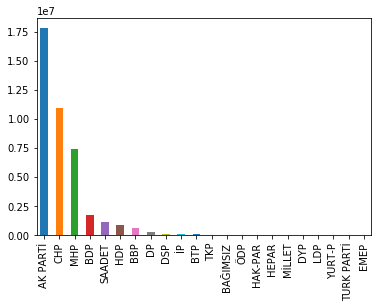

In [7]:
#         !--- HER ÇALIŞTIRIŞTA KÜMÜLATİF TOPLADIĞI İÇİN YORUM SATIRINA ALDIN ---!

partilerin_türkiye_geneli_oyları = Belediye_Meclisi_Oy_Sayıları.iloc(axis=1)[4:len(Belediye_Meclisi_Oy_Sayıları.columns)-1].sum(axis=0)
partilerin_türkiye_geneli_oyları = partilerin_türkiye_geneli_oyları.sort_values(ascending=False)
partilerin_türkiye_geneli_oyları.plot.bar()

## Soru-8
İzmir, İstanbul ve Ankara illerinde partilerin oy dağılımlarını gösteren ayrı ayrı pasta grafiklerden oluşan bir figür çizin. Pasta grafiklerde en çok oy olan ilk 5 parti ile diğer partilerin toplamı 'Diğer' etiketiyle yer almalıdır.

Text(0.5, 1.0, 'İstanbul')

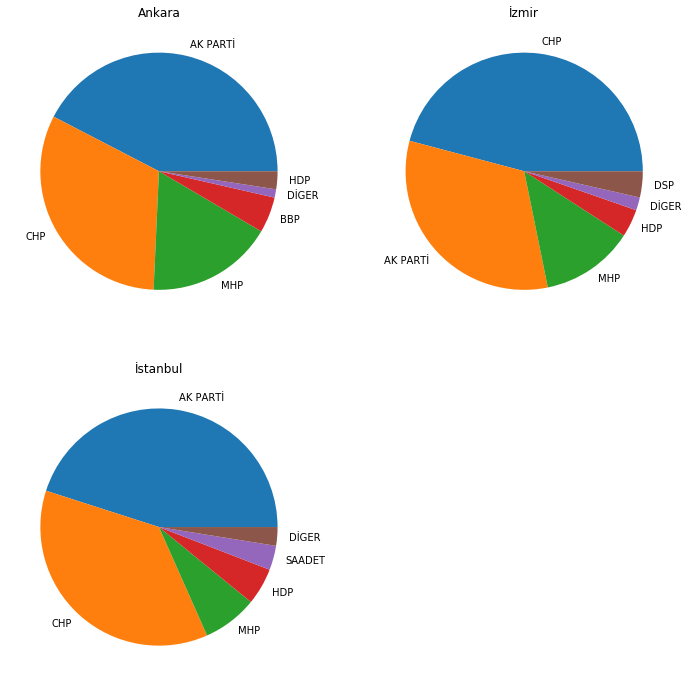

In [29]:
fig = plt.figure(figsize = (12,12))
izmir = Belediye_Meclisi_Oy_Sayıları.loc["İzmir"][4:len(Belediye_Meclisi_Oy_Sayıları.columns)-1]
istanbul = Belediye_Meclisi_Oy_Sayıları.loc["İstanbul"][4:len(Belediye_Meclisi_Oy_Sayıları.columns)-1]
ankara = Belediye_Meclisi_Oy_Sayıları.loc["Ankara"][4:len(Belediye_Meclisi_Oy_Sayıları.columns)-1]

ankara_top5 = ankara.sort_values(ascending=False)[:5]
izmir_top5 = izmir.sort_values(ascending=False)[:5]
istanbul_top5 = istanbul.sort_values(ascending=False)[:5]

ankara_others = ankara.sort_values(ascending=False)[5:].sum()
izmir_others = izmir.sort_values(ascending=False)[5:].sum()
istanbul_others = istanbul.sort_values(ascending=False)[5:].sum()

ankara_top5.at["DİGER"] = ankara_others
izmir_top5.at["DİGER"] = izmir_others
istanbul_top5.at["DİGER"] = istanbul_others

first = fig.add_subplot(2,2,1)
plt.pie(ankara_top5,labels=ankara_top5.sort_values(ascending=False).index)
plt.title("Ankara")
second = fig.add_subplot(2,2,2)
plt.pie(izmir_top5,labels=izmir_top5.sort_values(ascending=False).index)
plt.title("İzmir")
third = fig.add_subplot(2,2,3)
plt.pie(istanbul_top5,labels=istanbul_top5.sort_values(ascending=False).index)
plt.title("İstanbul")

# Soru-9
Partilerin illerdeki oy sayılarını oy oranları ile değiştirin ve listeleyin.

In [10]:
gecerli_oylar = Belediye_Meclisi_Oy_Sayıları["GEÇERLİ OY SAYISI"]
parti_oyları = Belediye_Meclisi_Oy_Sayıları.iloc(axis=1)[4:len(Belediye_Meclisi_Oy_Sayıları.columns)-1]
x = [parti_oyları[parti] / gecerli_oylar for parti in parti_oyları]
x = pd.DataFrame(x)
x = x.transpose()

x.index = Belediye_Meclisi_Oy_Sayıları.iloc(axis=1)[4:len(Belediye_Meclisi_Oy_Sayıları.columns)-1].index
Belediye_Meclisi_Oy_Sayıları.iloc(axis=1)[4:len(Belediye_Meclisi_Oy_Sayıları.columns)-1] = x.values
Belediye_Meclisi_Oy_Sayıları.iloc(axis=1)[4:len(Belediye_Meclisi_Oy_Sayıları.columns)-1]

,DSP,DYP,TURK PARTİ,TKP,BBP,AK PARTİ,YURT-P,DP,EMEP,ÖDP,...,HAK-PAR,LDP,BDP,BTP,İP,HDP,CHP,HEPAR,MHP,BAĞIMSIZ
İL ADI,,,,,,,,,,,,,,,,,,,,,
Adana,0.035012,0.000000,0.000000,0.007666,0.081149,3.061376,0.000000,0.135230,0.000000,0.006174,...,0.010235,0.001631,0.000000,0.022510,0.033324,0.816623,2.654708,0.000000,2.964266,0.014346
Adıyaman,0.028387,0.004888,0.000000,0.023969,0.702990,5.160379,0.000000,0.037739,0.000000,0.000000,...,0.000000,0.000000,0.668634,0.032099,0.000000,0.006157,1.794226,0.000000,0.919319,0.000000
Afyonkarahisar,0.004229,0.000000,0.000000,0.011978,0.153552,4.596748,0.000000,0.223451,0.013592,0.000000,...,0.000000,0.000000,0.000000,0.009912,0.000000,0.000000,1.149865,0.000000,3.583614,0.026539
Ağrı,0.000000,0.121375,0.000000,0.036994,0.035747,3.459188,0.000000,0.786721,0.000000,0.000000,...,0.031314,0.566417,4.242307,0.000000,0.000000,0.000000,0.066923,0.000000,0.098236,0.000000
Aksaray,0.043463,0.000000,0.000000,0.008011,0.351170,5.305973,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.026683,0.000000,0.000000,0.738549,0.000000,3.330411,0.000000
Amasya,0.000000,0.000000,0.000000,0.018567,0.063858,4.303938,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.005170,0.000000,0.007209,2.462483,0.000000,2.838201,0.000000
Ankara,0.015918,0.001812,0.000919,0.014872,0.488295,4.239057,0.001390,0.043699,0.000000,0.010213,...,0.006827,0.000000,0.000000,0.015765,0.028382,0.113392,3.189015,0.006951,1.726179,0.012057
Antalya,0.100994,0.010256,0.001335,0.008960,0.113697,3.386528,0.000000,0.029180,0.000000,0.010225,...,0.005040,0.000000,0.000000,0.015625,0.020343,0.250598,3.253455,0.004610,2.689442,0.007379
Ardahan,0.633884,0.000000,0.000000,0.039716,0.036058,3.027801,0.000000,0.646426,0.000000,0.000000,...,0.000000,0.000000,0.807901,0.068457,0.142663,0.000000,3.144335,0.000000,0.765573,0.125418


## Soru-10
Her ilde en yüksek oy oranına sahip olan partinin adını bulun ve bunları veri setine '1. parti" sütunu olarak ekleyin. Her partinin kaç ilde 1. parti olduğunu listeleyin.

In [77]:
birinci_partiler = Belediye_Meclisi_Oy_Sayıları.iloc(axis = 1)[4:len(Belediye_Meclisi_Oy_Sayıları.columns)-2].idxmax(axis=1)
Belediye_Meclisi_Oy_Sayıları["1. Parti"] = birinci_partiler
serie = Belediye_Meclisi_Oy_Sayıları["1. Parti"]
parti_listesi = [parti for parti in Belediye_Meclisi_Oy_Sayıları.iloc(axis = 1)[4:len(Belediye_Meclisi_Oy_Sayıları.columns)-2]]
parti_kac_ilde_birinci = [serie.str.count(parti).sum() for parti in parti_listesi]
partilerin_il_sayısı = pd.DataFrame().reindex_like(Belediye_Meclisi_Oy_Sayıları.iloc(axis = 1)[4:len(Belediye_Meclisi_Oy_Sayıları.columns)-2]).iloc(axis=0)[0]
partilerin_il_sayısı.transpose()
for i in range(len(partilerin_il_sayısı)):
    partilerin_il_sayısı[i] = parti_kac_ilde_birinci[i]
partilerin_il_sayısı.sort_values(ascending=False)
Belediye_Meclisi_Oy_Sayıları["1. Parti"]

İL ADI
Adana             AK PARTİ
Adıyaman          AK PARTİ
Afyonkarahisar    AK PARTİ
Ağrı                   BDP
Aksaray           AK PARTİ
Amasya            AK PARTİ
Ankara            AK PARTİ
Antalya           AK PARTİ
Ardahan                CHP
Artvin            AK PARTİ
Aydın                  CHP
Balıkesir         AK PARTİ
Bartın                 MHP
Batman                 BDP
Bayburt           AK PARTİ
Bilecik           AK PARTİ
Bingöl            AK PARTİ
Bitlis            AK PARTİ
Bolu              AK PARTİ
Burdur            AK PARTİ
Bursa             AK PARTİ
Çanakkale              CHP
Çankırı           AK PARTİ
Çorum             AK PARTİ
Denizli           AK PARTİ
Diyarbakır             BDP
Düzce             AK PARTİ
Edirne                 CHP
Elazığ            AK PARTİ
Erzincan          AK PARTİ
                    ...   
Kocaeli           AK PARTİ
Konya             AK PARTİ
Kütahya           AK PARTİ
Malatya           AK PARTİ
Manisa            AK PARTİ
Mardin               

## Soru-11 
Bağımsızların oy oranlarının en çok ve en az olduğu üç ilin adını ve oy oranlarını listeleyin.

In [78]:
ilk_üç_bağımsız_kazanan_il = Belediye_Meclisi_Oy_Sayıları["BAĞIMSIZ"].sort_values(ascending=False)[:3]
son_üç_bağımsız_il = Belediye_Meclisi_Oy_Sayıları["BAĞIMSIZ"].sort_values(ascending=True)[:3]
print("OY ORANI EN ÇOK OLAN BAĞIMSIZ ADAYLARIN OY ALDIĞI ÜÇ İL: ",ilk_üç_bağımsız_kazanan_il)
print("OY ORANI EN AZ OLAN BAĞIMSIZ ADAYLARIN OY ALDIĞI ÜÇ İL: ",son_üç_bağımsız_il)

OY ORANI EN ÇOK OLAN BAĞIMSIZ ADAYLARIN OY ALDIĞI ÜÇ İL:  İL ADI
Erzurum      0.145787
Ardahan      0.125418
Kastamonu    0.113581
Name: BAĞIMSIZ, dtype: float64
OY ORANI EN AZ OLAN BAĞIMSIZ ADAYLARIN OY ALDIĞI ÜÇ İL:  İL ADI
Niğde      0.0
Trabzon    0.0
Tokat      0.0
Name: BAĞIMSIZ, dtype: float64


## Soru-12
Türkiye genelinde oy oranı en yüksek ilk 2 partinin, illerdeki oy oranlarına göre bir histogram (bin=10) çizin.

([array([2., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([2., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([2., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([2., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([2., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([2., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 1., 1., 0., 0., 0., 0., 0., 0.]),
  array([0., 2., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([2., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([2., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([2., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([2., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([2., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([2., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([2., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([2., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([2., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([2., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([2., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([2., 0., 0., 0., 0., 0.

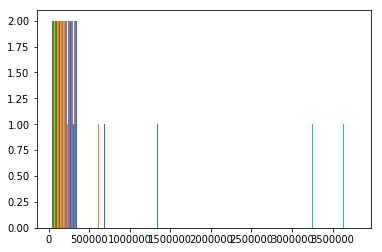

In [81]:
en_yüksek_oy_alan_iki_parti = parti_oyları.sum().sort_values(ascending=False)[:2].index

plt.hist(parti_oyları[en_yüksek_oy_alan_iki_parti],bins = 10)

## Soru-13 
Memnuniyet anketi veri kümesinin "Genel Memnuniyet" sütununu, seçim sonucu veri kümesi ile birleştirin. Genel memnuniyet oranı %50'den düşük olan illeri ve bu illerde 1. olan partileri listeleyin.

In [82]:
Belediye_Meclisi_Oy_Sayıları["Genel Memnuniyet"] = total_anketler["Genel Memnuniyet"]
Belediye_Meclisi_Oy_Sayıları[Belediye_Meclisi_Oy_Sayıları["Genel Memnuniyet"] < 50]["1. Parti"]

İL ADI
Adıyaman    AK PARTİ
Ağrı             BDP
Aksaray     AK PARTİ
Ardahan          CHP
Batman           BDP
Bayburt     AK PARTİ
Bingöl      AK PARTİ
Bitlis      AK PARTİ
Düzce       AK PARTİ
Elazığ      AK PARTİ
Hakkari          BDP
Iğdır            BDP
Kars        AK PARTİ
Kilis       AK PARTİ
Mardin           BDP
Muş         AK PARTİ
Siirt            BDP
Şırnak           BDP
Name: 1. Parti, dtype: object

## Soru-14

Büyükşehirler için 'Genel Memnuniyet' oranlarını büyükten küçüğe sıralayın.

In [83]:
Belediye_Meclisi_Oy_Sayıları[Belediye_Meclisi_Oy_Sayıları["BÜYÜKŞEHİR"] == "EVET"]["Genel Memnuniyet"].sort_values(ascending=False)

İL ADI
Manisa           77.735
Konya            77.115
İstanbul         72.229
Gaziantep        71.905
Balıkesir        70.872
Bursa            70.702
Denizli          69.216
Aydın            69.100
Kayseri          68.978
Sakarya          67.799
Ankara           65.689
Kocaeli          65.607
Trabzon          65.377
Samsun           64.787
Eskişehir        64.583
Şanlıurfa        61.626
Muğla            60.829
Tekirdağ         60.581
Mersin           60.202
Antalya          58.298
Adana            58.154
İzmir            57.491
Malatya          56.926
Diyarbakır       55.783
Kahramanmaraş    55.356
Ordu             54.894
Van              53.201
Erzurum          50.421
Hatay            50.384
Mardin           42.287
Name: Genel Memnuniyet, dtype: float64

## Soru-15
İl bazında seçime katılım oranları ile 'Genel Memnuniyet' oranlarını saçılım (scatter) grafiği olarak gösteriniz.

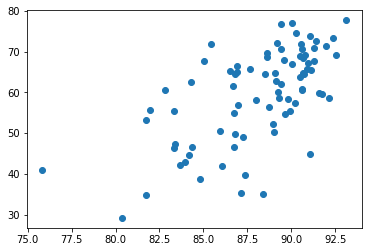

In [84]:
seçim_katılım_oranları = Belediye_Meclisi_Oy_Sayıları["OY KULLANAN SEÇMEN SAYISI"] / Belediye_Meclisi_Oy_Sayıları["KAYITLI SEÇMEN SAYISI"] * 100
plt.scatter(seçim_katılım_oranları,Belediye_Meclisi_Oy_Sayıları["Genel Memnuniyet"])
#???

## Soru-16


```
{'Akdeniz Bölgesi':  ['Adana', 'Antalya', 'Burdur', 'Hatay', 'Isparta',  'Kahramanmaraş', 'Mersin', 'Osmaniye'],
    'Doğu Anadolu': ['Ağrı', 'Ardahan', 'Bingöl', 'Bitlis', 'Elazığ', 'Erzincan', 'Erzurum', 'Hakkari', 'Iğdır', 'Kars', 'Malatya', 'Muş', 'Tunceli', 'Van'],
    'Ege Bölgesi': ['Afyonkarahisar', 'Aydın', 'Denizli', 'İzmir', 'Kütahya', 'Manisa', 'Muğla', 'Uşak'],
    'Güneydoğu Anadolu': ['Adıyaman', 'Batman', 'Diyarbakır', 'Gaziantep', 'Mardin', 'Siirt', 'Şanlıurfa', 'Şırnak', 'Kilis'],
    'İç Anadolu' : ['Aksaray', 'Ankara', 'Çankırı','Eskişehir', 'Karaman', 'Kayseri', 'Kırıkkale', 'Kırşehir', 'Konya', 'Nevşehir', 'Niğde', 'Sivas', 'Yozgat'],
    'Marmara' : ['Balıkesir', 'Bilecik', 'Bursa', 'Çanakkale', 'Edirne', 'İstanbul', 'Kırklareli', 'Kocaeli', 'Sakarya', 'Tekirdağ', 'Yalova'],
    'Karadeniz': ['Amasya', 'Artvin', 'Bartın', 'Bayburt', 'Bolu', 'Çorum', 'Düzce', 'Giresun', 'Gümüşhane', 'Karabük', 'Kastamonu', 'Ordu', 'Rize', 'Samsun', 'Sinop', 'Tokat', 'Trabzon', 'Zonguldak']}
    
```

İllerin yer aldıkları bölge isimlerini yeni bir sütun olarak ekleyin. 


In [85]:
reversed_bölgeler = {'Akdeniz Bölgesi':  ['Adana', 'Antalya', 'Burdur', 'Hatay', 'Isparta',  'Kahramanmaraş', 'Mersin', 'Osmaniye'],
    'Doğu Anadolu': ['Ağrı', 'Ardahan', 'Bingöl', 'Bitlis', 'Elazığ', 'Erzincan', 'Erzurum', 'Hakkari', 'Iğdır', 'Kars', 'Malatya', 'Muş', 'Tunceli', 'Van'],
    'Ege Bölgesi': ['Afyonkarahisar', 'Aydın', 'Denizli', 'İzmir', 'Kütahya', 'Manisa', 'Muğla', 'Uşak'],
    'Güneydoğu Anadolu': ['Adıyaman', 'Batman', 'Diyarbakır', 'Gaziantep', 'Mardin', 'Siirt', 'Şanlıurfa', 'Şırnak', 'Kilis'],
    'İç Anadolu' : ['Aksaray', 'Ankara', 'Çankırı','Eskişehir', 'Karaman', 'Kayseri', 'Kırıkkale', 'Kırşehir', 'Konya', 'Nevşehir', 'Niğde', 'Sivas', 'Yozgat'],
    'Marmara' : ['Balıkesir', 'Bilecik', 'Bursa', 'Çanakkale', 'Edirne', 'İstanbul', 'Kırklareli', 'Kocaeli', 'Sakarya', 'Tekirdağ', 'Yalova'],
    'Karadeniz': ['Amasya', 'Artvin', 'Bartın', 'Bayburt', 'Bolu', 'Çorum', 'Düzce', 'Giresun', 'Gümüşhane', 'Karabük', 'Kastamonu', 'Ordu', 'Rize', 'Samsun', 'Sinop', 'Tokat', 'Trabzon', 'Zonguldak']}
#reverse edip map etmem gerekti..
bölgeler ={}
for bölge,iller in reversed_bölgeler.items():
    for il in iller:
        bölgeler.setdefault(il,[]).append(bölge)

Belediye_Meclisi_Oy_Sayıları["BÖLGE"] = Belediye_Meclisi_Oy_Sayıları.index.map(bölgeler)
Belediye_Meclisi_Oy_Sayıları

,BÜYÜKŞEHİR,KAYITLI SEÇMEN SAYISI,OY KULLANAN SEÇMEN SAYISI,HÜDA PAR,DSP,DYP,TURK PARTİ,TKP,BBP,AK PARTİ,...,İP,HDP,CHP,HEPAR,MHP,BAĞIMSIZ,GEÇERLİ OY SAYISI,1. Parti,Genel Memnuniyet,BÖLGE
İL ADI,,,,,,,,,,,,,,,,,,,,,
Adana,EVET,1457671,1282849,0.0,0.035012,0.000000,0.000000,0.007666,0.081149,3.061376,...,0.033324,0.816623,2.654708,0.000000,2.964266,0.014346,12262.35,AK PARTİ,58.154,[Akdeniz Bölgesi]
Adıyaman,HAYIR,256815,223730,873.0,0.028387,0.004888,0.000000,0.023969,0.702990,5.160379,...,0.000000,0.006157,1.794226,0.000000,0.919319,0.000000,2128.77,AK PARTİ,35.231,[Güneydoğu Anadolu]
Afyonkarahisar,HAYIR,353839,325418,0.0,0.004229,0.000000,0.000000,0.011978,0.153552,4.596748,...,0.000000,0.000000,1.149865,0.000000,3.583614,0.026539,3098.32,AK PARTİ,71.415,[Ege Bölgesi]
Ağrı,HAYIR,101690,77104,0.0,0.000000,0.121375,0.000000,0.036994,0.035747,3.459188,...,0.000000,0.000000,0.066923,0.000000,0.098236,0.000000,722.73,BDP,40.923,[Doğu Anadolu]
Aksaray,HAYIR,190175,165992,0.0,0.043463,0.000000,0.000000,0.008011,0.351170,5.305973,...,0.000000,0.000000,0.738549,0.000000,3.330411,0.000000,1586.27,AK PARTİ,49.090,[İç Anadolu]
Amasya,HAYIR,157711,143670,0.0,0.000000,0.000000,0.000000,0.018567,0.063858,4.303938,...,0.000000,0.007209,2.462483,0.000000,2.838201,0.000000,1374.37,AK PARTİ,73.784,[Karadeniz]
Ankara,EVET,3609048,3281686,0.0,0.015918,0.001812,0.000919,0.014872,0.488295,4.239057,...,0.028382,0.113392,3.189015,0.006951,1.726179,0.012057,31450.40,AK PARTİ,65.689,[İç Anadolu]
Antalya,EVET,1514939,1360594,0.0,0.100994,0.010256,0.001335,0.008960,0.113697,3.386528,...,0.020343,0.250598,3.253455,0.004610,2.689442,0.007379,13037.42,AK PARTİ,58.298,[Akdeniz Bölgesi]
Ardahan,HAYIR,24244,20413,0.0,0.633884,0.000000,0.000000,0.039716,0.036058,3.027801,...,0.142663,0.000000,3.144335,0.000000,0.765573,0.125418,192.36,CHP,44.651,[Doğu Anadolu]


## Soru-17
Bölgelere göre 'Genel Memnuniyet' oranlarının ortalaması en yüksek ve en düşük olan illerin isimlerini ve memnuniyet oranlarını listeleyin.

In [86]:
Belediye_Meclisi_Oy_Sayıları['BÖLGE'] = Belediye_Meclisi_Oy_Sayıları['BÖLGE'].apply(lambda x: tuple(x))#list kalmaması için tuple a çevirdim. yoksa groupby üzerinde işlem yaptırmıyordu.
grouped = Belediye_Meclisi_Oy_Sayıları["Genel Memnuniyet"].groupby(by=Belediye_Meclisi_Oy_Sayıları["BÖLGE"])
bolge_max_memnuniyet = grouped.max()
bolge_min_memnuniyet = grouped.min()
for i in range(len(bolge_max_memnuniyet)):
    _max = Belediye_Meclisi_Oy_Sayıları[Belediye_Meclisi_Oy_Sayıları["Genel Memnuniyet"] == [bolge_max_memnuniyet[i]]]
    _min = Belediye_Meclisi_Oy_Sayıları[Belediye_Meclisi_Oy_Sayıları["Genel Memnuniyet"] == [bolge_min_memnuniyet[i]]]
    print("\n")
    print("MAXİMUM: ",_max["Genel Memnuniyet"],"  ",_max["BÖLGE"])
    print("MİNİMUM: ",_min["Genel Memnuniyet"],"  ",_max["BÖLGE"])



MAXİMUM:  İL ADI
Isparta    74.728
Name: Genel Memnuniyet, dtype: float64    İL ADI
Isparta    (Akdeniz Bölgesi,)
Name: BÖLGE, dtype: object
MİNİMUM:  İL ADI
Hatay    50.384
Name: Genel Memnuniyet, dtype: float64    İL ADI
Isparta    (Akdeniz Bölgesi,)
Name: BÖLGE, dtype: object


MAXİMUM:  İL ADI
Erzincan    64.645
Name: Genel Memnuniyet, dtype: float64    İL ADI
Erzincan    (Doğu Anadolu,)
Name: BÖLGE, dtype: object
MİNİMUM:  İL ADI
Hakkari    29.178
Name: Genel Memnuniyet, dtype: float64    İL ADI
Erzincan    (Doğu Anadolu,)
Name: BÖLGE, dtype: object


MAXİMUM:  İL ADI
Manisa    77.735
Name: Genel Memnuniyet, dtype: float64    İL ADI
Manisa    (Ege Bölgesi,)
Name: BÖLGE, dtype: object
MİNİMUM:  İL ADI
İzmir    57.491
Name: Genel Memnuniyet, dtype: float64    İL ADI
Manisa    (Ege Bölgesi,)
Name: BÖLGE, dtype: object


MAXİMUM:  İL ADI
Gaziantep    71.905
Name: Genel Memnuniyet, dtype: float64    İL ADI
Gaziantep    (Güneydoğu Anadolu,)
Name: BÖLGE, dtype: object
MİNİMUM:  İL ADI


## Soru-18
Bölgelere göre seçime katılım oranlarını ve geçersiz oy oranlarını listeleyin.

In [87]:
Belediye_Meclisi_Oy_Sayıları["Katılım Oranı"] = Belediye_Meclisi_Oy_Sayıları["OY KULLANAN SEÇMEN SAYISI"]/Belediye_Meclisi_Oy_Sayıları["KAYITLI SEÇMEN SAYISI"] 
Belediye_Meclisi_Oy_Sayıları["Geçersiz Oy Oranı"]= Belediye_Meclisi_Oy_Sayıları["OY KULLANAN SEÇMEN SAYISI"]-Belediye_Meclisi_Oy_Sayıları["GEÇERLİ OY SAYISI"]/Belediye_Meclisi_Oy_Sayıları["KAYITLI SEÇMEN SAYISI"]
katılım_oranı = Belediye_Meclisi_Oy_Sayıları["Katılım Oranı"].groupby(by=Belediye_Meclisi_Oy_Sayıları["BÖLGE"])
gecersiz_oy = Belediye_Meclisi_Oy_Sayıları["Geçersiz Oy Oranı"].groupby(by=Belediye_Meclisi_Oy_Sayıları["BÖLGE"])
print(katılım_oranı.sum())
print(gecersiz_oy.sum())

BÖLGE
(Akdeniz Bölgesi,)       7.180349
(Doğu Anadolu,)         11.708202
(Ege Bölgesi,)           7.322709
(Güneydoğu Anadolu,)     7.710808
(Karadeniz,)            15.861524
(Marmara,)               9.951139
(İç Anadolu,)           11.630583
Name: Katılım Oranı, dtype: float64
BÖLGE
(Akdeniz Bölgesi,)      5.726169e+06
(Doğu Anadolu,)         2.308959e+06
(Ege Bölgesi,)          6.338035e+06
(Güneydoğu Anadolu,)    3.591708e+06
(Karadeniz,)            3.736603e+06
(Marmara,)              1.460040e+07
(İç Anadolu,)           7.241847e+06
Name: Geçersiz Oy Oranı, dtype: float64


## Soru-19
Bölgelere ve partilere göre, partilerin 1. oldukları il sayılarını listeleyin.

In [88]:
grouped = Belediye_Meclisi_Oy_Sayıları.groupby([Belediye_Meclisi_Oy_Sayıları["1. Parti"],Belediye_Meclisi_Oy_Sayıları["BÖLGE"]])
grouped.count()["BÜYÜKŞEHİR"]

1. Parti  BÖLGE               
AK PARTİ  (Akdeniz Bölgesi,)       6
          (Doğu Anadolu,)          8
          (Ege Bölgesi,)           5
          (Güneydoğu Anadolu,)     4
          (Karadeniz,)            17
          (Marmara,)               7
          (İç Anadolu,)           12
BDP       (Doğu Anadolu,)          5
          (Güneydoğu Anadolu,)     5
CHP       (Doğu Anadolu,)          1
          (Ege Bölgesi,)           3
          (Marmara,)               4
          (İç Anadolu,)            1
MHP       (Akdeniz Bölgesi,)       2
          (Karadeniz,)             1
Name: BÜYÜKŞEHİR, dtype: int64